In [1]:
%cd "C:\Users\rossd\OneDrive\Documents\UGA MSBA\Spring 2022\ECON 6760"

C:\Users\rossd\OneDrive\Documents\UGA MSBA\Spring 2022\ECON 6760


In [2]:
import pandas_datareader as pdr
import pandas as pd
import datetime
import numpy as np
import math
import matplotlib.pyplot as plt

## Problem 2

### (a)

In [3]:
start = datetime.datetime (1950, 1, 1)
end = datetime.datetime (2022, 1, 1)

fred = pdr.DataReader(['CPIAUCSL'], 'fred', start, end)

In [4]:
fred.head()

,CPIAUCSL
DATE,
1950-01-01,23.51
1950-02-01,23.61
1950-03-01,23.64
1950-04-01,23.65
1950-05-01,23.77


In [5]:
fred = fred.rename(columns = {'CPIAUCSL':'CPI'})

In [6]:
fred['CPI Log'] = fred.apply(np.log)

In [7]:
fred['CPI Log Diff'] = fred['CPI Log'].diff(1)

In [8]:
fred['CPI Annualized Percentage'] = fred['CPI Log Diff']*100*12

In [9]:
fred

,CPI,CPI Log,CPI Log Diff,CPI Annualized Percentage
DATE,,,,
1950-01-01,23.510,3.157426,NaN,NaN
1950-02-01,23.610,3.161670,0.004244,5.093386
1950-03-01,23.640,3.162940,0.001270,1.523810
1950-04-01,23.650,3.163363,0.000423,0.507507
1950-05-01,23.770,3.168424,0.005061,6.073400
...,...,...,...,...
2021-08-01,273.012,5.609516,0.002740,3.287872
2021-09-01,274.138,5.613632,0.004116,4.939055
2021-10-01,276.724,5.623021,0.009389,11.266788


In [10]:
fred['CPI Annualized Percentage'].mean()

3.4457231331286655

### Answer to (a)

The average annual inflation rate from January 1950 to December 2021 is 3.45%

### (b)

In [11]:
fred_2000 = fred[fred.index > '1999-01-01']

In [14]:
fred_2000[0:12]

,CPI,CPI Log,CPI Log Diff,CPI Annualized Percentage
DATE,,,,
1999-02-01,164.7,5.104126,0.000000,0.000000
1999-03-01,164.8,5.104733,0.000607,0.728376
1999-04-01,165.9,5.111385,0.006653,7.983096
1999-05-01,166.0,5.111988,0.000603,0.723109
1999-06-01,166.0,5.111988,0.000000,0.000000
1999-07-01,166.7,5.116196,0.004208,5.049602
1999-08-01,167.1,5.118592,0.002397,2.875975
1999-09-01,167.8,5.122773,0.004180,5.016430
1999-10-01,168.1,5.124559,0.001786,2.143496


In [16]:
n = 11
unweighted_ma = []
for i in range(len(fred_2000['CPI Annualized Percentage'][11:])):
    unweighted_ma.append(fred_2000['CPI Annualized Percentage'][0+i:12+i].sum()/(n+1))

In [17]:
#add 11 zeroes to ma list

zero = 0
for i in range(0,11,1):
    unweighted_ma.insert(i,zero)

In [18]:
len(unweighted_ma)

275

In [19]:
#add to fred_2000 table

fred_2000['unweighted_ma'] = unweighted_ma

<ipython-input-19-0684d31c1304>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fred_2000['unweighted_ma'] = unweighted_ma


### Answer to (b)

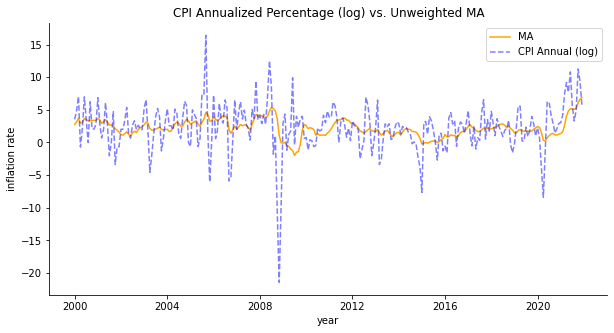

In [21]:
fig, ax = plt.subplots(figsize=(10,5))

ax.plot(fred_2000.index[11:],fred_2000['unweighted_ma'][11:], color = "orange", label = "MA")
ax.plot(fred_2000.index[11:], fred_2000['CPI Annualized Percentage'][11:], color = "blue", alpha = 0.5, linestyle ='--', label = "CPI Annual (log)")

ax.set_ylabel('inflation rate') 
ax.set_xlabel('year')                
ax.set_title('CPI Annualized Percentage (log) vs. Unweighted MA')
ax.spines['right'].set_visible(False) 
ax.spines['top'].set_visible(False) 

plt.legend()

### (c)

In [22]:
alpha = .10
smoothed_values = []
count = 0
for i in range(len(fred_2000['CPI Annualized Percentage'])):
    #count += 1
    if count <= 11:
        smoothed_values.append(fred_2000['CPI Annualized Percentage'][i] * alpha*(1-alpha)**(11-count))
        count += 1
    elif count > 11:
        count = 0
        smoothed_values.append(fred_2000['CPI Annualized Percentage'][i] * alpha*(1-alpha)**(11-count))
        count = 1
        

In [23]:
count = 0
new_smoothed_values = []
for i in range(len(smoothed_values[11:])):
    new_smoothed_values.append(sum(smoothed_values[0+i:12+i]))
    count += 12

In [25]:
len(new_smoothed_values)

264

In [26]:
#add 11 zeroes to smoothed list

zero = 0
for i in range(0,11,1):
    new_smoothed_values.insert(i,zero)

In [28]:
len(new_smoothed_values)

275

In [30]:
# add exponential smoothing to fred 2000 table


fred_2000['Exponential Smoothing'] = new_smoothed_values

<ipython-input-30-6ffce45b038d>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fred_2000['Exponential Smoothing'] = new_smoothed_values


In [34]:
fred_2000[-12:]

,CPI,CPI Log,CPI Log Diff,CPI Annualized Percentage,unweighted_ma,Exponential Smoothing
DATE,,,,,,
2021-01-01,262.231,5.569226,0.002562,3.074510,1.360696,1.425018
2021-02-01,263.161,5.572766,0.003540,4.248261,1.661772,1.538395
2021-03-01,264.793,5.578948,0.006182,7.418852,2.603144,1.932278
2021-04-01,266.832,5.586619,0.007671,9.205030,4.069208,2.613858
2021-05-01,268.551,5.593041,0.006422,7.705912,4.808998,2.996005
2021-06-01,270.981,5.602049,0.009008,10.809441,5.187595,3.213303
2021-07-01,272.265,5.606776,0.004727,5.672579,5.147792,3.187919
2021-08-01,273.012,5.609516,0.002740,3.287872,5.071666,3.133977
2021-09-01,274.138,5.613632,0.004116,4.939055,5.237709,3.264706


### Answer to (c)

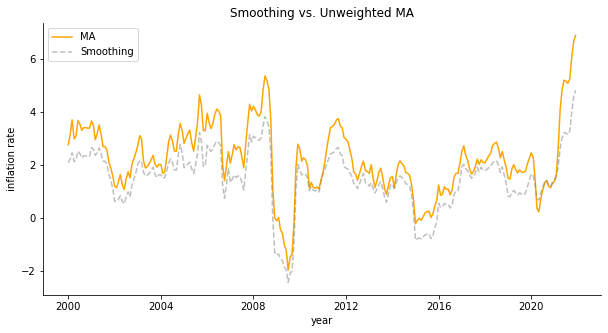

In [35]:
fig, ax = plt.subplots(figsize=(10,5))

ax.plot(fred_2000.index[11:],fred_2000['unweighted_ma'][11:], color = "orange", label = "MA")
ax.plot(fred_2000.index[11:], fred_2000['Exponential Smoothing'][11:], color = "grey", alpha = 0.5, linestyle ='--', label = "Smoothing")


ax.set_ylabel('inflation rate') 
ax.set_xlabel('year')                
ax.set_title('Smoothing vs. Unweighted MA')
ax.spines['right'].set_visible(False) 
ax.spines['top'].set_visible(False) 

plt.legend()

## Problem 3

In [47]:
start = datetime.datetime (1950, 1, 1)
end = datetime.datetime (2022, 1, 1)

fred_gdp = pdr.DataReader(['GDPC1'], 'fred', start, end)

In [48]:
fred_gdp.head()

,GDPC1
DATE,
1950-01-01,2186.365
1950-04-01,2253.045
1950-07-01,2340.112
1950-10-01,2384.920
1951-01-01,2417.311
